<a href="https://colab.research.google.com/github/FLdavidsw/App_machine_learning/blob/main/efficientnet_custom_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# cargando las librerías necesarias

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets
import matplotlib.pyplot as plt
from tensorflow.data import Dataset
from tensorflow.keras import Sequential
from tensorflow.keras.losses import categorical_crossentropy
from keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Dense, Dropout, Flatten
import os
import datetime
import numpy as np

from tensorflow.keras import datasets
from tensorflow.keras.utils import to_categorical
%load_ext tensorboard

carpeta con que contiene todos los archivos e imagenes = https://drive.google.com/drive/folders/1IuR8ZE7fOpq94ojCz0gU3ihBtq_PRx07?usp=sharing

In [ ]:
# Acceder a Gdrive y extraer los datos del .zip

from google.colab import drive # biblioteca de manejo de gDrive
import os
import pandas as pd

drive.mount('/content/gdrive', force_remount=True) #punto de montaje accesible desde el visor de Gdrive
basepath = "gdrive/My Drive/deep_learning_maestria/sesionefficientdet" # Ruta de acceso a la carpeta específica



Mounted at /content/gdrive


In [ ]:
!unzip "gdrive/My Drive/deep_learning_maestria/sesionefficientdet/data.zip" -d "gdrive/My Drive/deep_learning_maestria/sesionefficientdet"

Se han truncado las últimas 5000 líneas del flujo de salida.
  inflating: gdrive/My Drive/deep_learning_maestria/sesionefficientdet/data/train_data/running/images_099 (3).jpg  
  inflating: gdrive/My Drive/deep_learning_maestria/sesionefficientdet/data/train_data/running/images_099.jpg  
  inflating: gdrive/My Drive/deep_learning_maestria/sesionefficientdet/data/train_data/running/images_100.jpg  
  inflating: gdrive/My Drive/deep_learning_maestria/sesionefficientdet/data/train_data/running/images_101 (2).jpg  
  inflating: gdrive/My Drive/deep_learning_maestria/sesionefficientdet/data/train_data/running/images_101.jpg  
  inflating: gdrive/My Drive/deep_learning_maestria/sesionefficientdet/data/train_data/running/images_102 (2).jpg  
  inflating: gdrive/My Drive/deep_learning_maestria/sesionefficientdet/data/train_data/running/images_102.jpg  
  inflating: gdrive/My Drive/deep_learning_maestria/sesionefficientdet/data/train_data/running/images_103 (2).jpg  
  inflating: gdrive/My Driv

In [ ]:
!pip install pillow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#def base_datos(folder):
url_img = ''
#ciclo for dataset train
folder_train = os.path.join(basepath,'data/train_data')
folder_test = os.path.join(basepath,'data/test_data')
clases = os.listdir(folder_train)
# diccionario que almacena los nombres de las imagenes por cada carpeta
img_train = {}
img_test = {}
for i in range(len(clases)):
  #nombres img train
  train_imagen = os.path.join(folder_train, clases[i])
  img_train.update({clases[i]:os.listdir(train_imagen)})
  #nombres img test
  test_imagen = os.path.join(folder_test, clases[i])
  img_test.update({clases[i]:os.listdir(test_imagen)})

In [ ]:
#abrir imagenes y almacenar en arreglos de numpy para almacenar en un arreglo de mayor tamaño
from PIL import Image
# for que recorre el diccionario entrenamiento
x_train = []
y_train = []
etiqueta = 0
for clase in img_train:
  print(etiqueta)
  for img in range(len(img_train[clase])):
    url_img = os.path.join(folder_train, clase)
    url_img = os.path.join(url_img, img_train[clase][img])
    img = Image.open(url_img)
    img_resize = img.resize((128, 128))
    img.close()
    imgArray = np.array(img_resize)
    x_train.append(imgArray)
    y_train.append(etiqueta)
  etiqueta += 1
# for que recorre el diccionario de testeo
x_test = []
y_test = []
etiqueta2 = 0
for clase in img_test:
  for img in range(len(img_test[clase])):
    url_img2 = os.path.join(folder_test, clase)
    url_img2 = os.path.join(url_img2, img_test[clase][img])
    img2 = Image.open(url_img2)
    img_resize2 = img2.resize((128, 128))
    img2.close()
    imgArray2 = np.array(img_resize2)
    x_test.append(imgArray2)
    y_test.append(etiqueta2)
  etiqueta2 += 1

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14


In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

#ct = ColumnTransformer([('my_ohe', OneHotEncoder(), [0])], remainder='passthrough')
y_train= to_categorical(y_train, 15)
y_test= to_categorical(y_test, 15)

In [ ]:
print(y_train[14995:])

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [ ]:
from sklearn import preprocessing
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split


# "Desordenar los datos" de testeo

x_train, y_train = shuffle(x_train, y_train, random_state=1)
x_test, y_test = shuffle(x_test, y_test, random_state=1)

# datos para validación
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=4)
print(len(x_train))

13500


In [ ]:
print(y_val)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [ ]:
# Crear un objeto de la clase Dataset para que tensorflow cargue los datos 
# de forma óptima

train_ds = Dataset.from_tensor_slices((x_train, y_train))
test_ds = Dataset.from_tensor_slices((x_test, y_test))
val_ds = Dataset.from_tensor_slices((x_val, y_val))

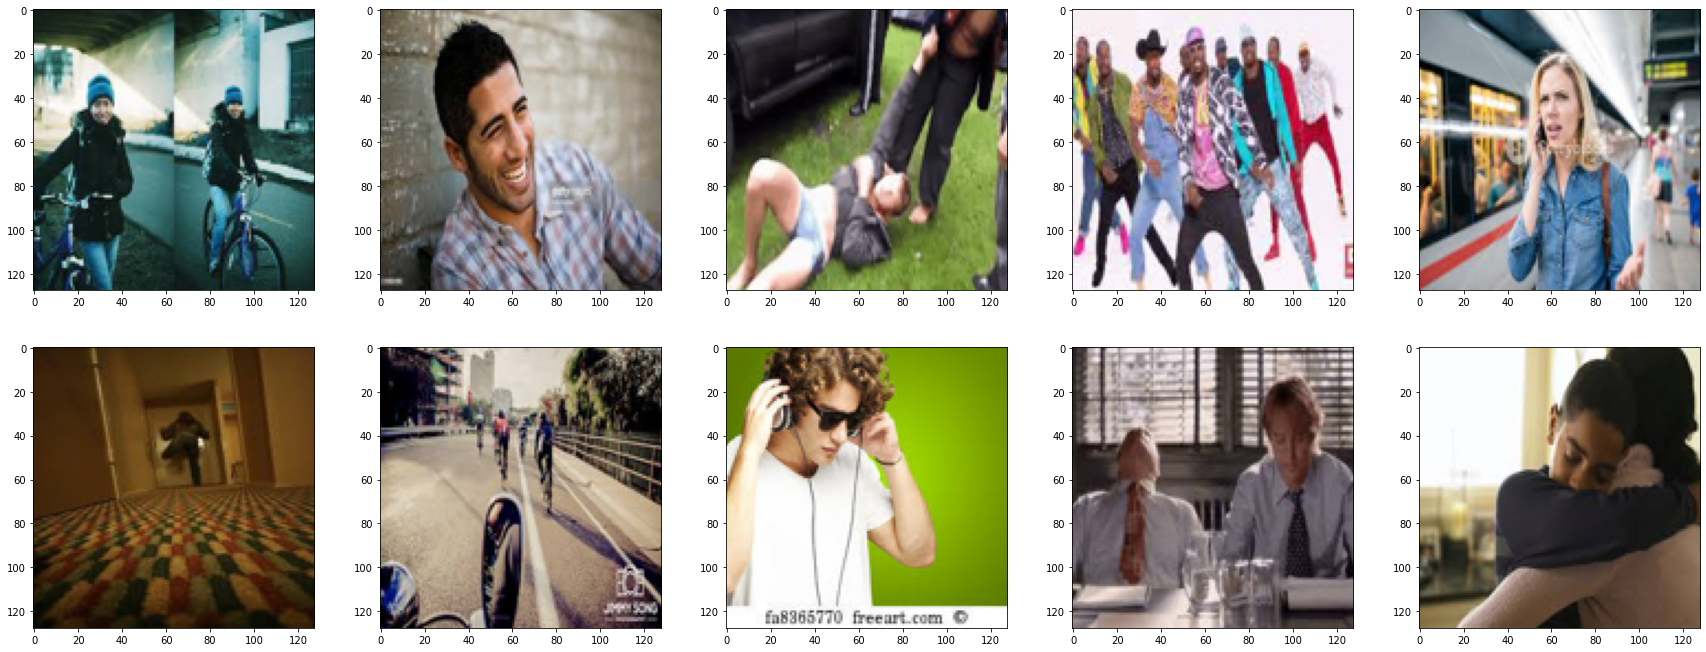

In [ ]:
def ver_imagenes():
    plt.figure(figsize=(30,30))
    for i, (imagen, etiqueta) in enumerate(test_ds.take(10)):
        ax = plt.subplot(5, 5, i+1)
        plt.imshow(imagen)
        #plt.title(clases[etiqueta.numpy()[0]])

ver_imagenes()

In [ ]:
#### Creando transformaciones que se ejecutarán en memoria
#función para normalizar una imagen
def normalizar(imagen, eiqueta):
  """Función para normalizar una imagen del dataset
  Se quiere que los datos esten entre 0 y 1
  La desviación estandar va a quedar de 1"""

  imagen = tf.image.per_image_standardization(imagen)

  # de una vez podemos re escalar la imagen
  imagen = tf.image.resize(imagen, (240, 240))
  #etiqueta = to_categorical(etiqueta, 15)

  return imagen, eiqueta


train_ds_batched = (train_ds.map(normalizar).batch(batch_size=16))
test_ds_batched = (test_ds.map(normalizar).batch(batch_size=16))
val_ds_batched = (val_ds.map(normalizar).batch(batch_size=16))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

tf.Tensor(
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]], shape=(16, 15), dtype=float32)
tf.Tensor(
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0

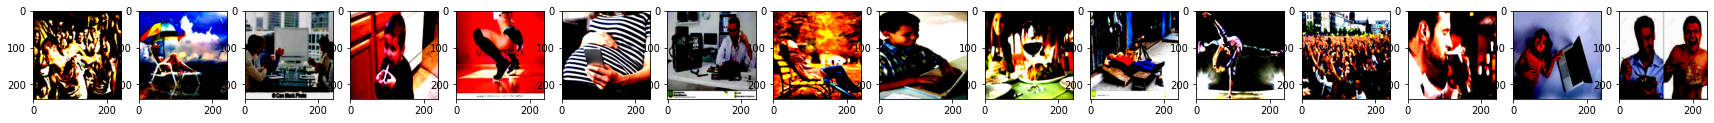

In [ ]:
for imagen, etiqueta in train_ds_batched.take(1):
  fig, ax = plt.subplots(1,16, figsize=(30,30))
  for i in range(16):
    ax[i].imshow(imagen[i])
    #print(etiqueta[i].numpy()[0])
    print(etiqueta)
    #ax[i].set_title(clases[etiqueta[i].numpy()[0]])

In [ ]:
#Se aplicara data augmentation para aumentar la cantidad de datos disponibles
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip('horizontal'),
  tf.keras.layers.RandomRotation(0.2)
])

Se inicia la implementación del modelo efficientnet pre-entrenado

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.applications import EfficientNetB1

NUM_CLASSES = 15
IMG_SIZE = 240
size = (IMG_SIZE, IMG_SIZE)

inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))

base_model = EfficientNetB1(input_tensor=inputs, input_shape=(240,240,3),include_top=False,weights='imagenet')

27033600/27018416 [==============================] - 2s 0us/step


Se congela la base convolucional para que los pesos ya pre-entrenados a partir de alex_net se mantenga, y solo se modifiquen los parametros de salida.

In [ ]:
base_model.trainable = True

In [ ]:
from tensorflow.keras import optimizers

In [ ]:
x = data_augmentation(inputs)
x = base_model(x, training=True)
x = layers.GlobalAveragePooling2D(name="avg_pooling")(x)
x = tf.keras.layers.Dropout(0.3, name="top_dropout")(x)
outputs = tf.keras.layers.Dense(15, activation="softmax", name="predictions")(x)
model = tf.keras.Model(inputs, outputs, name='EfficientNet_customize')

In [ ]:
model.compile(optimizer=optimizers.Adam(learning_rate=1e-3), loss="categorical_crossentropy", metrics=["accuracy"])

model.summary()


Model: "EfficientNet_customize"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 240, 240, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 240, 240, 3)       0         
                                                                 
 efficientnetb1 (Functional)  (None, 8, 8, 1280)       6575239   
                                                                 
 avg_pooling (GlobalAverageP  (None, 1280)             0         
 ooling2D)                                                       
                                                                 
 top_dropout (Dropout)       (None, 1280)              0         
                                                                 
 predictions (Dense)         (None, 15)                19215     
                                            

In [ ]:
import os
from tensorflow.keras.callbacks import (EarlyStopping, ModelCheckpoint, ReduceLROnPlateau)

In [ ]:
model_save = ModelCheckpoint('./weights/EfficientnetB1_{epoch}.h5',
                             save_best_only=True, monitor='val_loss', verbose=1)
early_stopping = EarlyStopping(monitor='val_loss',
                               patience=4, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2, cooldown=1, verbose=1)
hist = model.fit((train_ds_batched), epochs=50, validation_data=test_ds_batched, verbose=1,
                         callbacks=[model_save, reduce_lr, early_stopping])

Epoch 1/50
844/844 [==============================] - ETA: 0s - loss: 1.6256 - accuracy: 0.4805
Epoch 1: val_loss improved from inf to 1.41794, saving model to ./weights/EfficientnetB1_1.h5
844/844 [==============================] - 289s 308ms/step - loss: 1.6256 - accuracy: 0.4805 - val_loss: 1.4179 - val_accuracy: 0.5590 - lr: 0.0010
Epoch 2/50
844/844 [==============================] - ETA: 0s - loss: 1.2407 - accuracy: 0.6055
Epoch 2: val_loss improved from 1.41794 to 1.34171, saving model to ./weights/EfficientnetB1_2.h5
844/844 [==============================] - 252s 299ms/step - loss: 1.2407 - accuracy: 0.6055 - val_loss: 1.3417 - val_accuracy: 0.5840 - lr: 0.0010
Epoch 3/50
844/844 [==============================] - ETA: 0s - loss: 1.0687 - accuracy: 0.6601
Epoch 3: val_loss improved from 1.34171 to 1.29208, saving model to ./weights/EfficientnetB1_3.h5
844/844 [==============================] - 253s 299ms/step - loss: 1.0687 - accuracy: 0.6601 - val_loss: 1.2921 - val_accuracy

In [ ]:
#Guardamos el modelo en un archivo previamente creado
dir_modelo = os.path.join(basepath, "mi_modelo2")
model.save(dir_modelo)

INFO:tensorflow:Assets written to: gdrive/My Drive/deep_learning_maestria/sesionefficientdet/mi_modelo2/assets


In [ ]:
loss, acc = model.evaluate(val_ds_batched)

94/94 [==============================] - 6s 58ms/step - loss: 0.9493 - accuracy: 0.7300


In [ ]:
import matplotlib.pyplot as plt
from cv2 import cv2

In [ ]:
def imagen_a_tensor(imagen):
    """recibe np array como imagen y retorna tensor
    :param imagen:
    :return: ttf tensor"""
    imagen = np.expand_dims(imagen, 0)
    imagen = tf.convert_to_tensor(imagen, dtype=tf.float32)
    imagen = tf.image.per_image_standardization(imagen)
    return imagen
def reescalar_imagen(imagen, tam_salida=240):
    imagen_reescalada = cv2.resize(imagen, (tam_salida, tam_salida))
    return imagen_reescalada


In [ ]:
direccion_imagenes = os.path.join(basepath, 'imagenes_prueba')
listado_imagenes = os.listdir(direccion_imagenes)
print(listado_imagenes)

['motociclista.jpg', 'beber_agua.jpg', 'aplaudir.jpg', 'pelea.jpg', 'dormir.jpg', 'llamando.jpg', 'bailando.jpg', 'comiendo.jpg', 'abrazo.jpg', 'riendo.jpg', 'corriendo.jpg', 'sentar.jpg', 'running.jpg', 'sleeping.jpg', 'laptop.jpg', 'laptop2.jpg', 'ciclyng.jpg', 'videollamada (1).jpeg', 'videollamada2.jpeg']


In [ ]:
diccionario_imagenes = {}
i = 0
for imagen in listado_imagenes:
  image_prueba = os.path.join(direccion_imagenes,listado_imagenes[i])
  my_image = cv2.imread(image_prueba)
  image_reescalada = reescalar_imagen(my_image)
  image_reescalada = cv2.cvtColor(image_reescalada, cv2.COLOR_BGR2RGB)
  img_tensor = imagen_a_tensor(image_reescalada)
  diccionario_imagenes.update({imagen:img_tensor})
  i += 1
  #plt.imshow(image_reescalada)

In [ ]:
print(diccionario_imagenes)

{'motociclista.jpg': <tf.Tensor: shape=(1, 240, 240, 3), dtype=float32, numpy=
array([[[[ 0.88614476,  0.757513  , -0.41625193],
         [ 0.88614476,  0.7253551 , -0.41625193],
         [ 0.9504607 ,  0.7253551 , -0.35193604],
         ...,
         [ 1.1916453 ,  0.8218289 , -0.30369914],
         [ 1.1273293 ,  0.8057499 , -0.3358571 ],
         [ 1.1594872 ,  0.83790785, -0.30369914]],

        [[ 0.85398686,  0.7253551 , -0.4484099 ],
         [ 0.83790785,  0.6771181 , -0.46448886],
         [ 0.8057499 ,  0.59672326, -0.4966468 ],
         ...,
         [ 1.1755663 ,  0.8057499 , -0.30369914],
         [ 1.1434083 ,  0.8218289 , -0.28762016],
         [ 1.1755663 ,  0.85398686, -0.25546223]],

        [[ 0.8700658 ,  0.74143404, -0.46448886],
         [ 0.9183027 ,  0.757513  , -0.40017298],
         [ 0.9504607 ,  0.74143404, -0.36801502],
         ...,
         [ 1.0308555 ,  0.6610392 , -0.41625193],
         [ 1.0951715 ,  0.773592  , -0.3197781 ],
         [ 1.1112504 ,  0

In [ ]:
#predict.append(model.predict(imagen))
print(model.predict(diccionario_imagenes['motociclista.jpg']))

[[0.12979257 0.03275356 0.03003669 0.04913738 0.09315696 0.03096743
  0.05769725 0.04094945 0.04433144 0.09654265 0.02075995 0.02210297
  0.19403617 0.08416316 0.07357235]]


In [ ]:
predict = []
for imagen in diccionario_imagenes:
  prediccion = model.predict(diccionario_imagenes[imagen])
  predict.append(prediccion)
  print(imagen)
  print(prediccion)

motociclista.jpg
[[0.0807764  0.06202552 0.01894435 0.02406437 0.09230392 0.01919767
  0.07075545 0.0366537  0.06465378 0.07512543 0.02771872 0.04402922
  0.22459392 0.06236587 0.09679165]]
beber_agua.jpg
[[0.25444654 0.02156199 0.00401457 0.00151778 0.22964095 0.02002068
  0.02833703 0.00280142 0.03197249 0.1109855  0.00161337 0.00552365
  0.05711907 0.05963641 0.17080852]]
aplaudir.jpg
[[0.14168899 0.0315544  0.00612172 0.00126787 0.07947674 0.01464854
  0.02234927 0.00245516 0.05168553 0.18861477 0.00395711 0.00442804
  0.13267173 0.06160829 0.25747186]]
pelea.jpg
[[0.08959723 0.09781002 0.03031291 0.00404671 0.09201194 0.01281729
  0.0568313  0.12538876 0.02477271 0.03262007 0.01837509 0.01544761
  0.27942964 0.0360487  0.08449   ]]
dormir.jpg
[[0.19749545 0.01726118 0.00418792 0.00034398 0.06821097 0.00557213
  0.05667939 0.00165927 0.03370307 0.11409193 0.0021288  0.01746534
  0.15540649 0.09662581 0.22916819]]
llamando.jpg
[[0.4605239  0.0200392  0.00239278 0.00106419 0.05914295

In [ ]:
print(clases)

['calling', 'clapping', 'dancing', 'cycling', 'drinking', 'eating', 'hugging', 'fighting', 'laughing', 'listening_to_music', 'running', 'sleeping', 'sitting', 'using_laptop', 'texting']


In [ ]:
def etiqueta(vector, classes, num_etiquetas=3):
  copia_vector = vector.copy()
  valor_max = 0.0
  etiquetas = []
  for n in range(num_etiquetas):
    for i in range(len(copia_vector)):
      #guardar los 3 mayores valores
      if copia_vector[i] > valor_max:
        valor_max = copia_vector[i]
        index = i
        clase_valor = classes[i]+" "+str(valor_max)
    etiquetas.append(clase_valor)
    copia_vector[index] = 0
    valor_max = 0
    
  return etiquetas


In [ ]:
print(predict[18][0])

[0.2794624  0.02202854 0.01022752 0.00088502 0.09886156 0.00411352
 0.09383225 0.00468731 0.1176395  0.08792293 0.00520832 0.0076469
 0.08903814 0.05719003 0.12125605]


In [ ]:
for i in range(len(predict)):
  prueba_etiqueta = etiqueta(predict[i][0],clases)
  print(listado_imagenes[i])
  print(prueba_etiqueta)

motociclista.jpg
['sitting 0.22459392', 'texting 0.09679165', 'drinking 0.092303924']
beber_agua.jpg
['calling 0.25444654', 'drinking 0.22964095', 'texting 0.17080852']
aplaudir.jpg
['texting 0.25747186', 'listening_to_music 0.18861477', 'calling 0.14168899']
pelea.jpg
['sitting 0.27942964', 'fighting 0.12538876', 'clapping 0.09781002']
dormir.jpg
['texting 0.22916819', 'calling 0.19749545', 'sitting 0.15540649']
llamando.jpg
['calling 0.4605239', 'texting 0.1542913', 'listening_to_music 0.1024643']
bailando.jpg
['calling 0.18127003', 'laughing 0.16751608', 'sitting 0.13937137']
comiendo.jpg
['texting 0.21121643', 'calling 0.17702793', 'drinking 0.16885988']
abrazo.jpg
['hugging 0.14893454', 'texting 0.14833856', 'sitting 0.13575126']
riendo.jpg
['calling 0.15320167', 'drinking 0.11246976', 'using_laptop 0.10639307']
corriendo.jpg
['sitting 0.22318229', 'clapping 0.16174231', 'drinking 0.10450522']
sentar.jpg
['calling 0.17516723', 'sitting 0.17473204', 'drinking 0.16422214']
running.j

In [ ]:
print(listado_imagenes)

['motociclista.jpg', 'beber_agua.jpg', 'aplaudir.jpg', 'pelea.jpg', 'dormir.jpg', 'llamando.jpg', 'bailando.jpg', 'comiendo.jpg', 'abrazo.jpg', 'riendo.jpg', 'corriendo.jpg', 'sentar.jpg', 'running.jpg', 'sleeping.jpg', 'laptop.jpg', 'laptop2.jpg', 'ciclyng.jpg', 'videollamada (1).jpeg', 'videollamada2.jpeg']


In [ ]:
print(predict)

[array([[0.07974419, 0.06820551, 0.01894763, 0.01833363, 0.07947421,
        0.0200816 , 0.0604432 , 0.04016158, 0.0494585 , 0.08069832,
        0.03382283, 0.027151  , 0.2705085 , 0.07575445, 0.07721491]],
      dtype=float32), array([[0.26522964, 0.0279052 , 0.00578444, 0.00069722, 0.27103257,
        0.0144654 , 0.03624611, 0.00357813, 0.05842024, 0.09319594,
        0.00311613, 0.00964967, 0.06784324, 0.03579967, 0.10703638]],
      dtype=float32), array([[0.15320499, 0.03445773, 0.01196259, 0.00158124, 0.06126553,
        0.0105429 , 0.02487962, 0.00494332, 0.05710608, 0.20229684,
        0.00790294, 0.00679472, 0.17388207, 0.04250276, 0.20667665]],
      dtype=float32), array([[0.10832355, 0.11234319, 0.03403948, 0.00395282, 0.10874546,
        0.01350757, 0.04255542, 0.10838321, 0.02398738, 0.03461948,
        0.02134482, 0.01589023, 0.24539809, 0.03689914, 0.09001014]],
      dtype=float32), array([[0.19896719, 0.02378721, 0.00844435, 0.00056441, 0.1047229 ,
        0.00931091,